In [4]:
import cv2
import matplotlib.pyplot as plt

# PIXEL NORMALIZATION

nilai pixel terkecil sebelum di normalisasi : 12
nilai pixel terbesar sebelum di normalisasi : 248

nilai pixel terkecil setelah di normalisasi : 0.047058823529411764
nilai pixel terbesar setelah di normalisasi : 0.9725490196078431


(np.float64(-0.5), np.float64(639.5), np.float64(511.5), np.float64(-0.5))

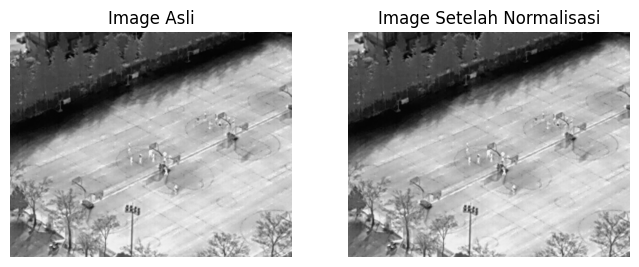

In [15]:
img = cv2.imread("images-for-test/0_60_30_0_01609.jpg", cv2.IMREAD_GRAYSCALE)
print(f"nilai pixel terkecil sebelum di normalisasi : {img.min()}")
print(f"nilai pixel terbesar sebelum di normalisasi : {img.max()}")


img_norm = img / 255.0
print(f"\nnilai pixel terkecil setelah di normalisasi : {img_norm.min()}")
print(f"nilai pixel terbesar setelah di normalisasi : {img_norm.max()}")


# menampilkan gambar asli dan gambar hasil normalisasi
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Image Asli")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Image Setelah Normalisasi")
plt.imshow(img_norm, cmap='gray')
plt.axis('off')

# NOICE REDUCTION